In [ ]:
# Se eligió inicialmente a Indonesia, porque parecía interesante usar a un país compuesto de una infinidad de Islas
# Sin embargo, luego me di cuenta de que no tenía ríos en el archivo que nos dieron, así que lo cambié por el Congo

In [1]:
# Primero se invoca a Geopandas
import os, geopandas as gpd

In [3]:
# Después, se le hace leer a los archivos locales de countries, cities y rivers que se crearon en la carpeta maps
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [7]:
# Se revisan
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [8]:
# Se revisan
cities

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)
...,...,...,...,...
605,Singapore,Singapore,N,POINT (103.82688 1.34654)
606,Gaza,Palestine,N,POINT (34.41939 31.46288)
607,Juba,South Sudan,Y,POINT (31.76671 4.57511)
608,Dili,East Timor,Y,POINT (125.67275 -8.56601)


In [9]:
# Se revisan
rivers

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."
...,...,...,...
93,Yangtze,None,"MULTILINESTRING ((119.82609 32.24864, 118.9707..."
94,Yenisey,None,"MULTILINESTRING ((98.94706 52.57675, 98.12095 ..."
95,Yukon,None,"LINESTRING (-130.89319 59.24480, -131.06570 59..."
96,Zambezi,None,"MULTILINESTRING ((35.52866 -17.66773, 36.28055..."


In [11]:
# Ahora, se plotean

<Axes: >

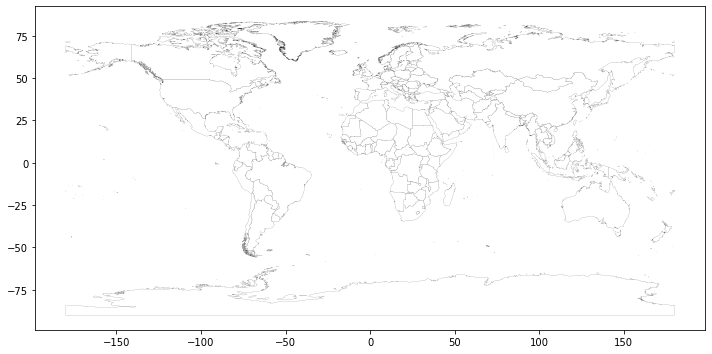

In [19]:
countries.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))

<Axes: >

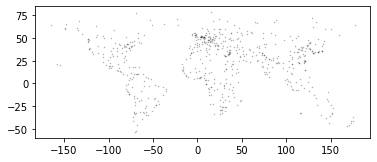

In [23]:
cities.plot(marker='.', color='black', markersize=1, alpha=0.3)

<Axes: >

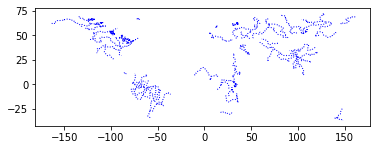

In [24]:
rivers.plot(edgecolor='blue', linewidth=1, linestyle='dotted')

In [15]:
# Se revisa que todos tengan la misma proyección

In [16]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Parece que sí, entonces se procede a procesarlos

In [26]:
# En mi caso, como elegí al congo y hay dos países que se contienen esta palabra en su nombre, hay que averiguar cómo se llaman 
# para cada gdf
# para países
countries[countries['COUNTRY'].str.contains('Congo', regex=False, case=False, na=False)]

,COUNTRY,geometry
39,Congo,"POLYGON ((15.89050 -3.94301, 15.88028 -3.95111..."
40,Democratic Republic of the Congo,"POLYGON ((16.10007 -5.85937, 15.92833 -5.86139..."


In [27]:
# para ciudades
cities[cities['COUNTRY'].str.contains('Congo', regex=False, case=False, na=False)]

,NAME,COUNTRY,CAPITAL,geometry
258,Kisangani,DR Congo,N,POINT (25.19615 0.51928)
262,Brazzaville,Congo,Y,POINT (15.28515 -4.28519)
263,Kananga,DR Congo,N,POINT (22.40278 -5.89221)
313,Kinshasa,DR Congo,Y,POINT (15.46929 -4.38867)
344,Matadi,DR Congo,N,POINT (13.45000 -5.81000)
348,Kahemba,DR Congo,N,POINT (19.00000 -7.33000)
395,Mbandaka,DR Congo,N,POINT (18.46000 0.05000)
459,Pointe Noire,Congo,N,POINT (12.05809 -4.63871)
535,Lumumbashi,DR Congo,N,POINT (27.55000 -11.68000)


In [28]:
## Curioso, en uno de los archivos el país se llama 'Democratic Republic of the Congo' y en el otro 'DR Congo'

In [29]:
# Primero, se recorta el mapa de countries
CongoDR=countries[countries.COUNTRY=='Democratic Republic of the Congo']

<Axes: >

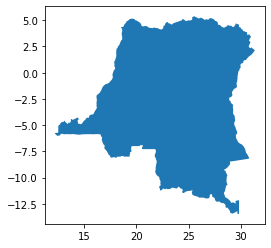

In [30]:
CongoDR.plot()

In [31]:
# Después, las ciudades, pero con el otro nombre
cities_DRC=cities[cities.COUNTRY=='DR Congo']

<Axes: >

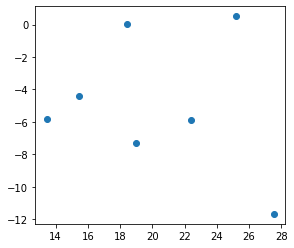

In [32]:
cities_DRC.plot()

In [33]:
# Para el caso de los ríos, hay que clippear el mapa para que concuerde con la parte recortada que se preparó previamente
rivers_DRC = gpd.clip(gdf=rivers, mask=CongoDR)

<Axes: >

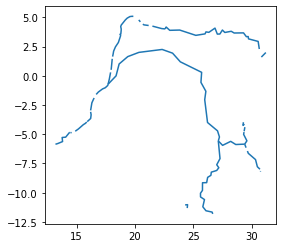

In [34]:
rivers_DRC.plot()

<Axes: >

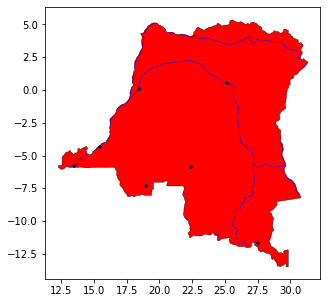

In [35]:
# Ahora, se une todo
base = CongoDR.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_DRC.plot(marker='+', color='black', markersize=15,ax=base)
rivers_DRC.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [36]:
# Para el mapa interactivo, primero se necesitan las coordenadas
# Se obtuvieron de aquí: https://www.geodatos.net/en/coordinates/democratic-republic-of-the-congo
CongoDR_Coord=[-4.038333, 21.758664]

In [41]:
# Primero, hay que invocar a folium
import folium

# Después, se plottea, con las coordenadas que se registraron previamente
m = cities_DRC.explore(location=CongoDR_Coord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_DRC.explore(m=m, color="blue",
                   name="rivers")
m

In [46]:
# Para guardar lo obtenido, es una opción usar un sistema de referencia de coordenadas que esté proyectado, 
# de forma que se puedan medir distancias y demás (Antes estaba en geográfico, que es como un globo terráqueo, en proyectado se aplana)
# Se encontró uno adecuado aquí: https://epsg.io/?q=congo&page=2
# Entonces, se cambia para los tres mapas que se tiene

CongoDR=countries[countries.COUNTRY=='Democratic Republic of the Congo']
CongoDR_4282=CongoDR.to_crs(4282)

cities_DRC=cities[cities.COUNTRY=='DR Congo']
cities_4282=cities_DRC.to_crs(CongoDR_4282.crs)

rivers_4282=rivers.to_crs(CongoDR_4282.crs)
rivers_4282=gpd.clip(gdf=rivers_4282,mask=CongoDR_4282)

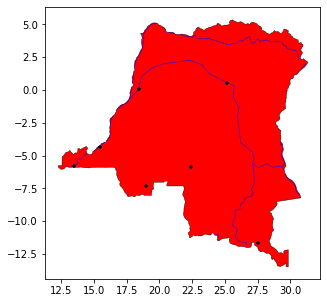

In [48]:
# Para exportar, se puede grabar la imagen del plot en una carpeta del repositorio

import matplotlib.pyplot as plt

base = CongoDR_4282.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_4282.plot(marker='+', color='black', markersize=15,ax=base)
mapEnd=rivers_4282.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapEnd.jpg'))

In [49]:
# Después, se exportan los mapas iniciales como un archivo gpkg

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")